In [132]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combined_data = pd.merge(ride_data, city_data, on = "city", how = "outer")

# Display the data table for preview
combined_data.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

In [133]:
urban_grouped_data = combined_data.loc[combined_data["type"] == "Urban", :].groupby("city")

urban_ride_sharing_data = pd.DataFrame({"City Type": urban_grouped_data["type"].unique().str.get(0),
                                  "Total Number of Rides": urban_grouped_data["ride_id"].count(),
                                  "Average Fare": urban_grouped_data["fare"].mean(),
                                  "Total Number of Drivers": urban_grouped_data["driver_count"].sum()
                                  })

suburban_grouped_data = combined_data.loc[combined_data["type"] == "Suburban", :].groupby("city")

suburban_ride_sharing_data = pd.DataFrame({"City Type": suburban_grouped_data["type"].unique().str.get(0),
                                  "Total Number of Rides": suburban_grouped_data["ride_id"].count(),
                                  "Average Fare": suburban_grouped_data["fare"].mean(),
                                  "Total Number of Drivers": suburban_grouped_data["driver_count"].sum()
                                  })

rural_grouped_data = combined_data.loc[combined_data["type"] == "Rural", :].groupby("city")

rural_ride_sharing_data = pd.DataFrame({"City Type": rural_grouped_data["type"].unique().str.get(0),
                                  "Total Number of Rides": rural_grouped_data["ride_id"].count(),
                                  "Average Fare": rural_grouped_data["fare"].mean(),
                                  "Total Number of Drivers": rural_grouped_data["driver_count"].sum()
                                  })


In [134]:
# Obtain the x and y coordinates for each of the three city types
x_axis_urban = urban_ride_sharing_data["Total Number of Rides"]
y_axis_urban = urban_ride_sharing_data["Average Fare"]
x_axis_suburban = suburban_ride_sharing_data["Total Number of Rides"]
y_axis_suburban = suburban_ride_sharing_data["Average Fare"]
x_axis_rural = rural_ride_sharing_data["Total Number of Rides"]
y_axis_rural = rural_ride_sharing_data["Average Fare"]
urban_data_size = urban_ride_sharing_data["Total Number of Drivers"]
suburban_data_size = suburban_ride_sharing_data["Total Number of Drivers"]
rural_data_size = rural_ride_sharing_data["Total Number of Drivers"]


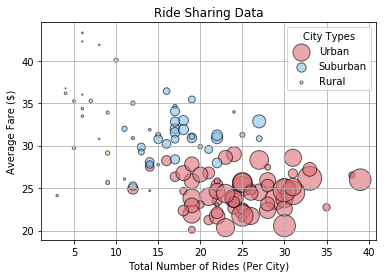

In [135]:
# Build the scatter plots for each city types
fig, ax = plt.subplots()

urban_plt = plt.scatter(x_axis_urban, y_axis_urban, c="#DE6E75", s=urban_data_size/4, alpha=0.6, edgecolors="black")
suburban_plt = plt.scatter(x_axis_suburban, y_axis_suburban, c="#81C0EB", s=suburban_data_size/4, alpha=0.6, edgecolors="black")
rural_plt = plt.scatter(x_axis_rural, y_axis_rural, c="#EBDD81", s=rural_data_size/4, alpha=0.6, edgecolors="black")

# Create a legend
plt.legend((urban_plt, suburban_plt, rural_plt),
           ("Urban", "Suburban", "Rural"),
           title = "City Types",
           loc = "upper right")

# Incorporate a text label regarding circle size
plt.title("Ride Sharing Data")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

plt.grid(True)

# Save Figure
plt.savefig("./images/ride_sharing_data.png")

# Show plot
plt.show()

## Total Fares by City Type

In [136]:
# Calculate Type Percents
type_grouped_data = combined_data.groupby("type")

fares_percent_by_type = pd.DataFrame({"City Type": type_grouped_data["type"].unique().str.get(0),
                           "Total Fare": type_grouped_data["fare"].sum()
                            })


fares_percent_by_type["% of Total Fare"] = fares_percent_by_type["Total Fare"] / fares_percent_by_type["Total Fare"].sum() * 100
fares_percent_by_type = fares_percent_by_type.set_index("City Type")
fares_percent_by_type.head()

,Total Fare,% of Total Fare
City Type,,
Rural,4327.93,6.811493
Suburban,19356.33,30.463872
Urban,39854.38,62.724635


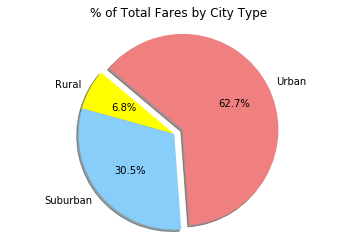

In [137]:
# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
sizes = fares_percent_by_type["% of Total Fare"]
colors = ["yellow", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% of Total Fares by City Type")

plt.axis("equal")

# Save Figure
plt.savefig("./images/percent_fares_by_city_type.png")

# Show Figure
plt.show()

## Total Rides by City Type

In [138]:
# Calculate Ride Percents
rides_percent_by_type = pd.DataFrame({"City Type": type_grouped_data["type"].unique().str.get(0),
                                      "Total Rides": type_grouped_data["ride_id"].count()
                                        })


rides_percent_by_type["% of Total Rides"] = rides_percent_by_type["Total Rides"] / rides_percent_by_type["Total Rides"].sum() * 100
rides_percent_by_type = rides_percent_by_type.set_index("City Type")
rides_percent_by_type.head()


,Total Rides,% of Total Rides
City Type,,
Rural,125,5.263158
Suburban,625,26.315789
Urban,1625,68.421053


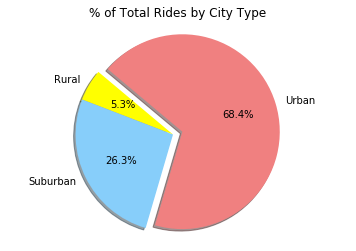

In [139]:
# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
sizes = rides_percent_by_type["% of Total Rides"]
colors = ["yellow", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% of Total Rides by City Type")

plt.axis("equal")

# Save Figure
plt.savefig("./images/percent_rides_by_city_type.png")

# Show Figure
plt.show()

## Total Drivers by City Type

In [140]:
# Calculate Driver Percents
drivers_percent_by_type = pd.DataFrame({"City Type": type_grouped_data["type"].unique().str.get(0),
                                        "Total Drivers": type_grouped_data["driver_count"].sum()
                                        })


drivers_percent_by_type["% of Total Drivers"] = drivers_percent_by_type["Total Drivers"] / drivers_percent_by_type["Total Drivers"].sum() * 100
drivers_percent_by_type = drivers_percent_by_type.set_index("City Type")
drivers_percent_by_type.head()

,Total Drivers,% of Total Drivers
City Type,,
Rural,537,0.781557
Suburban,8570,12.472893
Urban,59602,86.745550


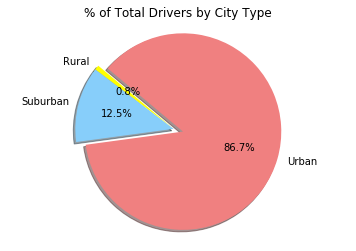

In [141]:
# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
sizes = drivers_percent_by_type["% of Total Drivers"]
colors = ["yellow", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% of Total Drivers by City Type")

plt.axis("equal")

# Save Figure
plt.savefig("./images/percent_drivers_by_city_type.png")

# Show Figure
plt.show()